In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies=pd.read_csv('/content/drive/MyDrive/Movie Recomendation System/imdb_top_1000.csv')

In [4]:
data=movies.copy()

In [5]:
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Most of the features are not very important to the model so we will consider only those features which will help in gener prediction

In [7]:
data=data[['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating','Overview', 'Director','Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes']]

In [8]:
data.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,The Godfather: Part II,1974,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,12 Angry Men,1957,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845


## ***Data Exploration and Pre-processing***

In [9]:
data.isnull().sum()

Series_Title     0
Released_Year    0
Genre            0
IMDB_Rating      0
Overview         0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data['cast']=data['Star1'] +', '+ data['Star2']+', '+data['Star3']+', '+data['Star4']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,cast
0,The Shawshank Redemption,1994,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,The Godfather: Part II,1974,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."
4,12 Angry Men,1957,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."


In [13]:
data['Genre'][1]

'Crime, Drama'

Let's which all movie genres have been covered in this dataset

In [14]:
# get all genre tags in a list
data['Genre'].nunique()

202


1.   There are over 202 unique genre tags in our dataset. That is quite a big number. I can hardy recall 5-6 genres. So, let's find out what are these tags.
2.   We will use FreqDist( ) of the nltk library to create a dictionary of genres and their occurence count across the dataset.


In [15]:
import nltk
all_genres = nltk.FreqDist(data['Genre'])
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})

In [16]:
all_genres_df

,Genre,Count
0,Drama,85
1,"Crime, Drama",26
2,"Action, Crime, Drama",30
3,"Action, Adventure, Drama",14
4,"Biography, Drama, History",28
...,...,...
197,"Action, Adventure, Family",1
198,"Action, Crime, Mystery",1
199,"Animation, Drama, Romance",1
200,"Drama, War, Western",1


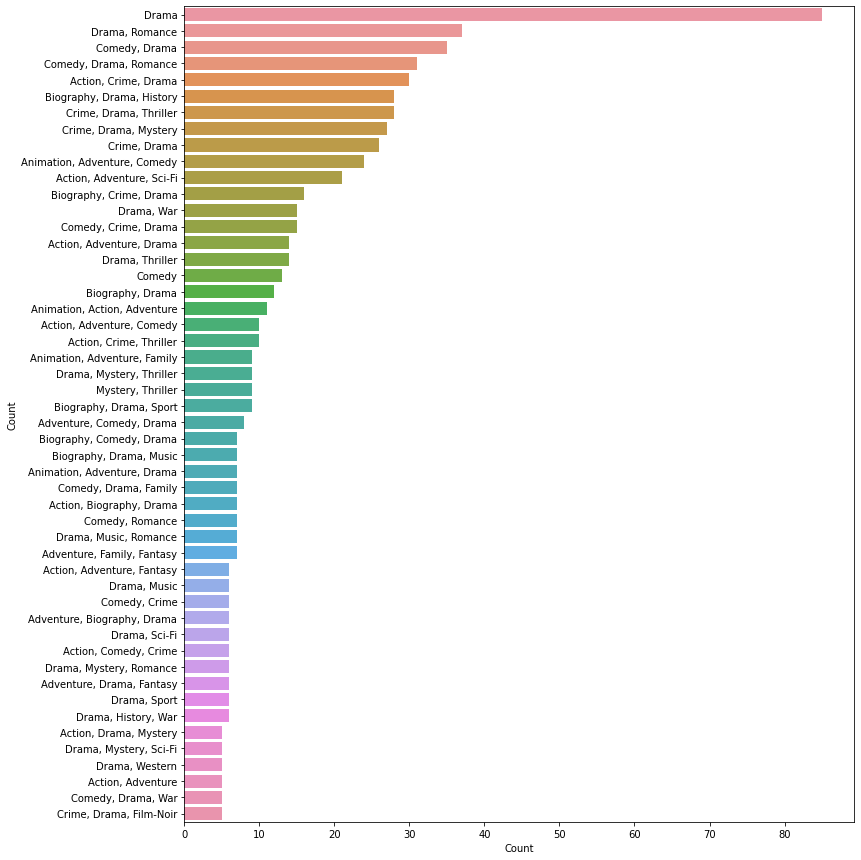

In [17]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()

As expected, the most frequent tags are "Drama", "Comedy", "Romance", "Mystry", and "Action". The rest of the genres in the data are in some way or other derived from the top 5 genres.


In [47]:
#Ploting total movie released in each yesr
sns.set(rc={'figure.figsize':(6,3)})
grouped= data.groupby(['Released_Year'])['Series_Title'].count()
grouped.sort_values(ascending=False)


Released_Year
2014    32
2004    31
2009    29
2016    28
2013    28
2001    27
2006    26
2007    26
2015    25
2012    24
1993    23
2019    23
2010    23
2017    22
2003    22
2008    21
1995    19
2002    19
2018    19
2000    19
1997    19
2011    18
2005    17
1999    17
1998    17
1994    13
1962    13
1979    12
1992    12
1991    12
1987    12
1973    12
1982    11
1989    11
1988    11
1960    11
1967    10
1996    10
1971     9
1957     9
1986     9
1975     9
1984     9
1985     9
1980     8
1990     8
1968     8
1972     8
1966     7
1959     7
1940     7
1976     7
1978     7
1964     7
1954     6
1948     6
1955     6
1974     6
2020     6
1963     5
1939     5
1946     5
1950     5
1951     5
1953     5
1983     5
1956     5
1961     5
1944     4
1958     4
1952     4
1981     4
1965     4
1938     3
1933     3
1942     3
1931     3
1949     3
1935     3
1977     3
1970     3
1969     3
1925     2
1932     2
1928     2
1934     2
1945     2
1941     2
1947     2
1927   

In [18]:
data['cast'].nunique()

998

In [19]:
pd.set_option('display.max_colwidth', 300)

In [20]:
data['Overview'][0:5]

0                                                                           Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.
1                                                                                   An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
2    When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
3                             The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.
4                                                                                A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.
Name: Overview, dtype: ob

We can see that there are to many punctuations in our datastet. Now we will clean our dataset for better analysis

In [21]:
# function for text cleaning

import re

def clean_text(text):
    text = re.sub("\'", "", text)    # remove backslash-apostrophe
    text = re.sub("[^a-zA-Z]"," ",text)    # remove everything alphabets
    text = ' '.join(text.split())    # remove whitespaces
    text = text.lower()     # convert text to lowercase 
    return text

In [22]:
data['clean_overview'] = data['Overview'].apply(lambda x: clean_text(x))

In [23]:
data[['Overview', 'clean_overview']].sample(3)

,Overview,clean_overview
609,"The dwarves, along with Bilbo Baggins and Gandalf the Grey, continue their quest to reclaim Erebor, their homeland, from Smaug. Bilbo Baggins is in possession of a mysterious and magical ring.",the dwarves along with bilbo baggins and gandalf the grey continue their quest to reclaim erebor their homeland from smaug bilbo baggins is in possession of a mysterious and magical ring
790,160 elite U.S. soldiers drop into Somalia to capture two top lieutenants of a renegade warlord and find themselves in a desperate battle with a large force of heavily-armed Somalis.,elite u s soldiers drop into somalia to capture two top lieutenants of a renegade warlord and find themselves in a desperate battle with a large force of heavily armed somalis
894,"The former World Heavyweight Champion Rocky Balboa serves as a trainer and mentor to Adonis Johnson, the son of his late friend and former rival Apollo Creed.",the former world heavyweight champion rocky balboa serves as a trainer and mentor to adonis johnson the son of his late friend and former rival apollo creed


In the clean_overview column the text is in lowercase and there is also no punctuation mark. So, our text cleaning has worked like a charm. This function below can visualize the words with their frequencies, in a set of documents. Let's use it to find out the most frequent words in the movie overview.

In [24]:
def freq_words(x, terms):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  return d

In [25]:
pd.set_option('display.max_row', 300)

In [26]:
# print 100 most frequent words
freq_words(data['clean_overview'], 100)

,word,count
5,a,1623
33,the,1210
29,to,807
7,of,784
11,and,703
60,in,570
26,his,516
18,an,292
65,is,245
101,with,242


Most of the terms in the plot above are stopwords. These stopwords carry less important meaning than other keywords in the text. Therefore, we will remove them from the plots' text.

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [29]:
data['clean_overview'] = data['clean_overview'].apply(lambda x: remove_stopwords(x))

In [30]:
freq_words(data['clean_overview'], 100)

,word,count
392,young,132
165,man,114
44,life,109
0,two,104
71,world,83
48,new,73
98,war,65
217,story,63
587,love,61
35,one,60


In [32]:
data.columns

Index(['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Overview',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'cast',
       'clean_overview'],
      dtype='object')

In [33]:
data=data[['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating','clean_overview','No_of_Votes', 'cast','Director' ]]

In [34]:
data.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,clean_overview,No_of_Votes,cast,Director
0,The Shawshank Redemption,1994,Drama,9.3,two imprisoned men bond number years finding solace eventual redemption acts common decency,2343110,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",Frank Darabont
1,The Godfather,1972,"Crime, Drama",9.2,organized crime dynastys aging patriarch transfers control clandestine empire reluctant son,1620367,"Marlon Brando, Al Pacino, James Caan, Diane Keaton",Francis Ford Coppola
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,menace known joker wreaks havoc chaos people gotham batman must accept one greatest psychological physical tests ability fight injustice,2303232,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",Christopher Nolan
3,The Godfather: Part II,1974,"Crime, Drama",9.0,early life career vito corleone new york city portrayed son michael expands tightens grip family crime syndicate,1129952,"Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",Francis Ford Coppola
4,12 Angry Men,1957,"Crime, Drama",9.0,jury holdout attempts prevent miscarriage justice forcing colleagues reconsider evidence,689845,"Henry Fonda, Lee J. Cobb, Martin Balsam, John Fiedler",Sidney Lumet
